In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import pandas_datareader.data as web
import h5py
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
class YahooDailyReader():
    
    def __init__(self, symbol=None, start=None, end=None):
        import datetime, time
        self.symbol = symbol
        
        # initialize start/end dates if not provided
        if end is None:
            end = datetime.datetime.today()
        if start is None:
            start = datetime.datetime(2014,2,5)
        
        self.start = start
        self.end = end
        
        # convert dates to unix time strings
        unix_start = int(time.mktime(self.start.timetuple()))
        day_end = self.end.replace(hour=23, minute=59, second=59)
        unix_end = int(time.mktime(day_end.timetuple()))
        
        url = 'https://finance.yahoo.com/quote/{}/history?'
        url += 'period1={}&period2={}'
        url += '&filter=history'
        url += '&interval=1d'
        url += '&frequency=1d'
        self.url = url.format(self.symbol, unix_start, unix_end)
        
    def read(self):
        import requests, re, json
       
        r = requests.get(self.url)
        
        ptrn = r'root\.App\.main = (.*?);\n}\(this\)\);'
        txt = re.search(ptrn, r.text, re.DOTALL).group(1)
        jsn = json.loads(txt)
        df = pd.DataFrame(
                jsn['context']['dispatcher']['stores']
                ['HistoricalPriceStore']['prices']
                )
        df.insert(0, 'symbol', self.symbol)
        df['date'] = pd.to_datetime(df['date'], unit='s').dt.date
        
        # drop rows that aren't prices
        df = df.dropna(subset=['close'])
        
        df = df[['symbol', 'date', 'high', 'low', 'open', 'close', 
                 'volume', 'adjclose']]
        df = df.set_index('symbol')
        return df
       
    
ydr = YahooDailyReader('^GSPC')
df = ydr.read()

In [6]:
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>


In [7]:
print(df['date'].dtype)

object


In [8]:
df=df.sort_values(by='date') 

In [9]:
df

,date,high,low,open,close,volume,adjclose
symbol,,,,,,,
^GSPC,2014-02-04,1758.729980,1743.819946,1743.819946,1755.199951,4068410000,1755.199951
^GSPC,2014-02-05,1755.790039,1737.920044,1753.380005,1751.640015,3984290000,1751.640015
^GSPC,2014-02-06,1774.060059,1752.989990,1752.989990,1773.430054,3825410000,1773.430054
^GSPC,2014-02-07,1798.030029,1776.010010,1776.010010,1797.020020,3775990000,1797.020020
^GSPC,2014-02-10,1799.939941,1791.829956,1796.199951,1799.839966,3312160000,1799.839966
^GSPC,2014-02-11,1823.540039,1800.410034,1800.449951,1819.750000,3699380000,1819.750000
^GSPC,2014-02-12,1826.550049,1815.969971,1820.119995,1819.260010,3326380000,1819.260010
^GSPC,2014-02-13,1830.250000,1809.219971,1814.819946,1829.829956,3289510000,1829.829956
^GSPC,2014-02-14,1841.650024,1825.589966,1828.459961,1838.630005,3114750000,1838.630005


In [10]:
df.set_index('date', inplace=True)
print(df)

                   high          low         open        close      volume  \
date                                                                         
2014-02-04  1758.729980  1743.819946  1743.819946  1755.199951  4068410000   
2014-02-05  1755.790039  1737.920044  1753.380005  1751.640015  3984290000   
2014-02-06  1774.060059  1752.989990  1752.989990  1773.430054  3825410000   
2014-02-07  1798.030029  1776.010010  1776.010010  1797.020020  3775990000   
2014-02-10  1799.939941  1791.829956  1796.199951  1799.839966  3312160000   
2014-02-11  1823.540039  1800.410034  1800.449951  1819.750000  3699380000   
2014-02-12  1826.550049  1815.969971  1820.119995  1819.260010  3326380000   
2014-02-13  1830.250000  1809.219971  1814.819946  1829.829956  3289510000   
2014-02-14  1841.650024  1825.589966  1828.459961  1838.630005  3114750000   
2014-02-18  1842.869995  1835.010010  1839.030029  1840.760010  3421110000   
2014-02-19  1847.500000  1826.989990  1838.900024  1828.750000  

In [11]:
data=df

In [12]:
btc_trace = go.Scatter(x=data.index, y=data['adjclose'], name= 'Price')
py.iplot([btc_trace])

In [13]:
data['adjclose'].replace(0, np.nan, inplace=True)
data['adjclose'].fillna(method='ffill', inplace=True)

In [14]:
btc_trace = go.Scatter(x=data.index, y=data['adjclose'], name= 'Price')
py.iplot([btc_trace])

In [15]:
from sklearn.preprocessing import MinMaxScaler
values = data['adjclose'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [16]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

828 355


In [17]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [18]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

827
354


In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:
trainX.shape

(827, 1, 1)

In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=False)

Train on 827 samples, validate on 354 samples
Epoch 1/300
 - 1s - loss: 0.2571 - val_loss: 0.7178
Epoch 2/300
 - 0s - loss: 0.2068 - val_loss: 0.6453
Epoch 3/300
 - 0s - loss: 0.1552 - val_loss: 0.5688
Epoch 4/300
 - 0s - loss: 0.1099 - val_loss: 0.4915
Epoch 5/300
 - 0s - loss: 0.0780 - val_loss: 0.4210
Epoch 6/300
 - 0s - loss: 0.0667 - val_loss: 0.3692
Epoch 7/300
 - 0s - loss: 0.0720 - val_loss: 0.3506
Epoch 8/300
 - 0s - loss: 0.0739 - val_loss: 0.3533
Epoch 9/300
 - 0s - loss: 0.0705 - val_loss: 0.3562
Epoch 10/300
 - 0s - loss: 0.0677 - val_loss: 0.3520
Epoch 11/300
 - 0s - loss: 0.0657 - val_loss: 0.3425
Epoch 12/300
 - 0s - loss: 0.0645 - val_loss: 0.3321
Epoch 13/300
 - 0s - loss: 0.0636 - val_loss: 0.3236
Epoch 14/300
 - 0s - loss: 0.0626 - val_loss: 0.3169
Epoch 15/300
 - 0s - loss: 0.0612 - val_loss: 0.3099
Epoch 16/300
 - 0s - loss: 0.0598 - val_loss: 0.3020
Epoch 17/300
 - 0s - loss: 0.0585 - val_loss: 0.2937
Epoch 18/300
 - 0s - loss: 0.0572 - val_loss: 0.2855
Epoch 19/

Epoch 154/300
 - 0s - loss: 0.0100 - val_loss: 0.0173
Epoch 155/300
 - 0s - loss: 0.0102 - val_loss: 0.0168
Epoch 156/300
 - 0s - loss: 0.0101 - val_loss: 0.0160
Epoch 157/300
 - 0s - loss: 0.0098 - val_loss: 0.0165
Epoch 158/300
 - 0s - loss: 0.0100 - val_loss: 0.0172
Epoch 159/300
 - 0s - loss: 0.0102 - val_loss: 0.0168
Epoch 160/300
 - 0s - loss: 0.0101 - val_loss: 0.0158
Epoch 161/300
 - 0s - loss: 0.0098 - val_loss: 0.0165
Epoch 162/300
 - 0s - loss: 0.0100 - val_loss: 0.0171
Epoch 163/300
 - 0s - loss: 0.0102 - val_loss: 0.0165
Epoch 164/300
 - 0s - loss: 0.0101 - val_loss: 0.0159
Epoch 165/300
 - 0s - loss: 0.0098 - val_loss: 0.0161
Epoch 166/300
 - 0s - loss: 0.0100 - val_loss: 0.0166
Epoch 167/300
 - 0s - loss: 0.0102 - val_loss: 0.0164
Epoch 168/300
 - 0s - loss: 0.0102 - val_loss: 0.0150
Epoch 169/300
 - 0s - loss: 0.0098 - val_loss: 0.0159
Epoch 170/300
 - 0s - loss: 0.0100 - val_loss: 0.0164
Epoch 171/300
 - 0s - loss: 0.0102 - val_loss: 0.0160
Epoch 172/300
 - 0s - loss: 

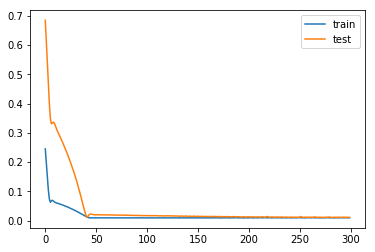

In [21]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

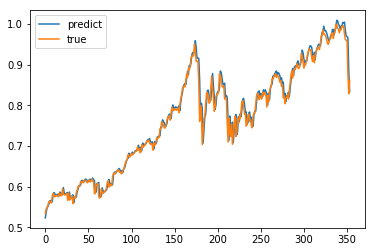

In [22]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [48]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [49]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 35.103


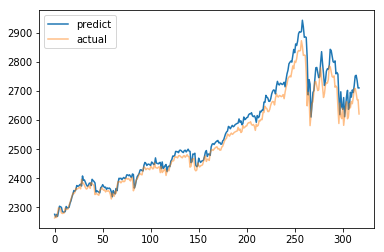

In [50]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [51]:
predictDates = data.tail(len(testX)).index

In [52]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [53]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

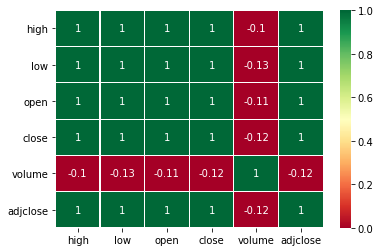

In [54]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [55]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [56]:
values = data[['adjclose'] + ['volume']].values
values = values.astype('float32')